In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-bf0j8830 because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Using PCA study similarities in stock behaviour

In this example we will use stock prices of 9 companies from Jan 2015 to Mar 2023. Four of the companies belong to the Tech sector and four belong to the Financial sector. There is one company which is unknown.

We will use PCA to analyse these stocks and guess the sector to which the unknown company belongs to.

The data is given in `stocks.csv` which we import as a data frame using pandas. This dataframe has 2052 rows and 9 columns. Since we are intersted in trends rather than actual stock prices, the data is converted to percent change using `.pct_change()`. This is common practice when looking for trends in time series data.

In [2]:
#Import the data

stocks = pd.read_csv('stocks.csv', index_col=0).pct_change().dropna()

symbols=stocks.columns

stocks.head()


,AAPL,AMZN,AXP,BAC,GOOG,GS,Unknown,MS,MSFT
Date,,,,,,,,,
2015-01-05,-0.028172,-0.020517,-0.026446,-0.029050,-0.020846,-0.031223,-0.031045,-0.031258,-0.009196
2015-01-06,0.000094,-0.022833,-0.021312,-0.029919,-0.023177,-0.020229,-0.025929,-0.028800,-0.014677
2015-01-07,0.014022,0.010600,0.018842,0.004745,-0.001713,0.014903,0.001526,0.014278,0.012705
2015-01-08,0.038422,0.006836,0.014175,0.020661,0.003153,0.015965,0.022346,0.014889,0.029418
2015-01-09,0.001073,-0.011749,-0.012667,-0.017930,-0.012951,-0.015347,-0.017387,-0.016271,-0.008405


The company names and their sectors is given below

In [3]:
stocks = stocks.to_numpy()
companies = pd.read_csv('companies.csv')

companies


,Ticker,Company Name,Sector
0,AAPL,Apple Inc.,Tech
1,AMZN,"Amazon.com, Inc.",Tech
2,AXP,American Express Company,Finance
3,BAC,Bank of America Corporation,Finance
4,GOOG,Alphabet Inc.,Tech
5,GS,"Goldman Sachs Group, Inc. (The)",Finance
6,MS,Morgan Stanley,Finance
7,MSFT,Microsoft Corporation,Tech
8,Unknown,Unknown,Unknown


## 1) Run PCA on the stocks data:

Recall that PCA requires each axial mean to be 0. Compute the average of the given stocks and store the result as `stocks_avg`.

In [4]:
#grade

stocks_avg = np.average(stocks, axis=0)

Shift each of the stocks by stocks_avg so that the shifted dataset has an average equal to 0. This is a necessary step for PCA. Store the result as `stocks_centered`.

In [5]:
#grade

stocks_centered = stocks - stocks_avg

You have finished pre-processing the data and are now prepared to conduct PCA. Compute the SVD of `stocks_centered` representing the shifted stocks data. Store the 1d array of singular values as `S` and the 2d array of right singular vectors (as columns) as `V`.

*Hint: Recall that `numpy.linalg.svd` returns the triple `U, S, Vt` where `U` stores $U$, `S` stores $\Sigma$ (as a 1d numpy array for the diagonal), and `Vt` stores $V^T$ from the SVD decomposition $U\Sigma V^T$ of the input matrix.*

Make sure to compute the reduced form of the SVD (`full_matrices=False`), otherwise the computation will take too long, and the auto-grader will abort.

In [6]:
#grade
U_stock, S_stock, V_stock = la.svd(stocks_centered, full_matrices=False)
U = U_stock
S = S_stock
V = V_stock.T


## 2) Using the pricipal components to group stocks

Using the SVD decomposition find the first two principal components and call them `pc1` and `pc2`.

*Hint: Recall that the columns of the matrices V are the principal components.*

In [7]:
#grade

pc1 = V[:,0]
pc2 = V[:,1]


Both `pc1` and `pc2` are 1d arrays with length 9. Each entry corresponds to one company's stock and is called the exposure of that stock. Stocks with similar exposures over both principal components have the same trends.

Plot `pc1` vs `pc2` and notice if there are any clustering of stocks based on sector.

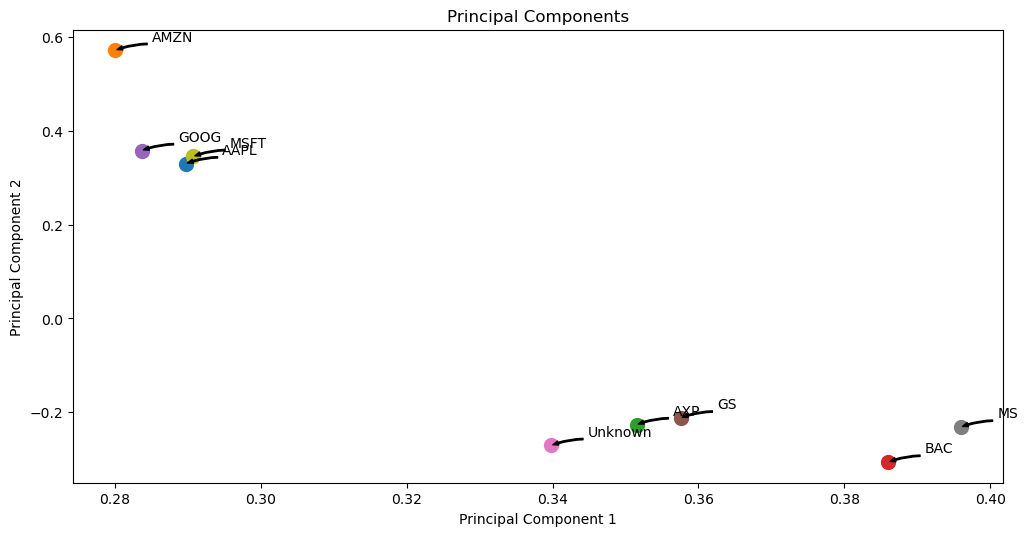

In [8]:
# Plot principal components
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
for i, (x, y) in enumerate(zip(pc1,pc2)):
    ax.scatter(x, y, marker='o', s=100)
    ax.annotate(symbols[i], xy=(x, y), xytext=(x+0.005, y+0.02),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=3, headlength=4, connectionstyle='arc3,rad=0.1'))

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Principal Components')
plt.show()

What's your guess for the sector of the unknown company?